In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [137]:
df1 = pd.read_csv('Sunspots.csv')
df1.isnull().sum()

Unnamed: 0                           0
Date                                 0
Monthly Mean Total Sunspot Number    0
dtype: int64

In [74]:
type(df1)

pandas.core.frame.DataFrame

In [138]:
df1.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [139]:
df1['Monthly Mean Total Sunspot Number'].values

array([ 96.7, 104.3, 116.7, ...,  34. ,  21.8,  10.4])

In [153]:
df2 = df1['Monthly Mean Total Sunspot Number']
df2

1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
              ...  
2020-09-30      0.6
2020-10-31     14.4
2020-11-30     34.0
2020-12-31     21.8
2021-01-31     10.4
Name: Monthly Mean Total Sunspot Number, Length: 3265, dtype: float64

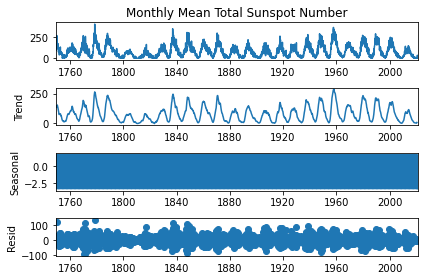

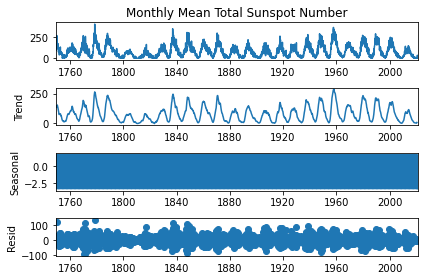

In [156]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2)
result.plot()

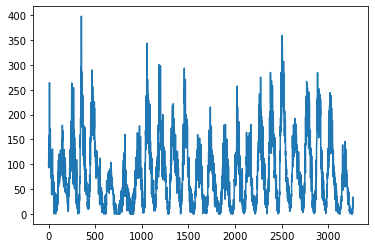

In [90]:
pyplot.plot(df1['Monthly Mean Total Sunspot Number'].values)

In [72]:
import statsmodels.datasets.co2 as co2
co2_data = co2.load(as_pandas=True).data
print(co2_data)
type(co2_data)

              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4
...           ...
2001-12-01  370.3
2001-12-08  370.8
2001-12-15  371.2
2001-12-22  371.3
2001-12-29  371.5

[2284 rows x 1 columns]


pandas.core.frame.DataFrame

In [94]:
df1['Date'].values

array(['1749-01-31', '1749-02-28', '1749-03-31', ..., '2020-11-30',
       '2020-12-31', '2021-01-31'], dtype=object)

In [149]:
df2 = df1.drop('Date',axis=1)

In [142]:
df1.index = pd.to_datetime(df1['Date'].values)

In [100]:
df1.index

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31'],
              dtype='datetime64[ns]', length=3265, freq=None)

In [87]:
co2_data.values

array([[316.1],
       [317.3],
       [317.6],
       ...,
       [371.2],
       [371.3],
       [371.5]])

In [91]:
co2_data.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [103]:
months = [x.month for x in df1.index]
years = [x.year for x in df1.index]
day = [x.day for x in df1.index]
X = np.array([day, months, years]).T

<AxesSubplot:>

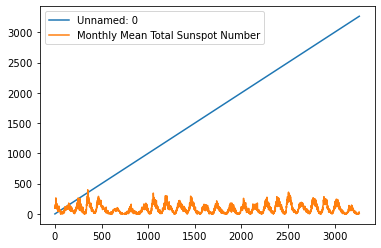

In [52]:
df1.plot()

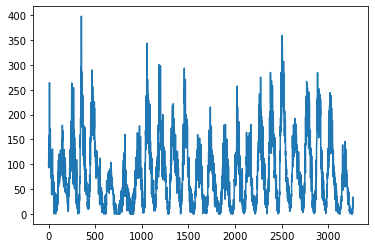

In [4]:
plt.plot(df1['Monthly Mean Total Sunspot Number'])

In [161]:
#checking for stationarity
from statsmodels.tsa.stattools import adfuller
dfst = adfuller(df1['Monthly Mean Total Sunspot Number'],autolag='AIC')
print('1. ADF :',dfst[0])
print('2. P-value :',dfst[1])
print('3. Lags used :',dfst[2])
print('4. Number of Observations Used :',dfst[3])
print('5. Critical Value : ', bdfst[4])

1. ADF : -10.49705166254614
2. P-value : 1.10855249219565e-18
3. Lags used : 28
4. Number of Observations Used : 3236
5. Critical Value :  {'1%': -3.4323724026124003, '5%': -2.8624335760905684, '10%': -2.5672456699774324}


In [216]:
dfst1 = adfuller(df1['Monthly Mean Total Sunspot Number'].diff(),autolag='AIC')
print('1. ADF :',dfst1[0])
print('2. P-value :',dfst1[1])
print('3. Lags used :',dfst1[2])
print('4. Number of Observations Used :',dfst1[3])
print('5. Critical Value : ', dfst1[4])

MissingDataError: exog contains inf or nans

AR model

In [6]:
from statsmodels.tsa.ar_model import AutoReg
Var1=df1['Monthly Mean Total Sunspot Number'].values
Var1

array([ 96.7, 104.3, 116.7, ...,  34. ,  21.8,  10.4])

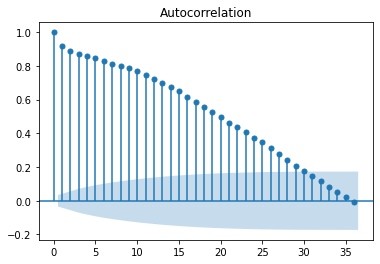

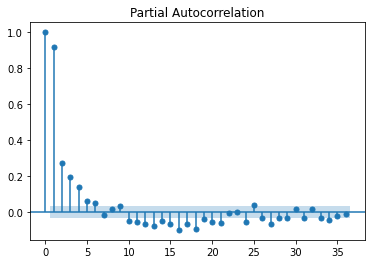

In [7]:
#to get how many lags to use, we check ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(df1['Monthly Mean Total Sunspot Number'])
pacf = plot_pacf(df1['Monthly Mean Total Sunspot Number'])

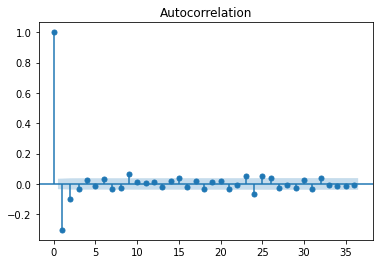

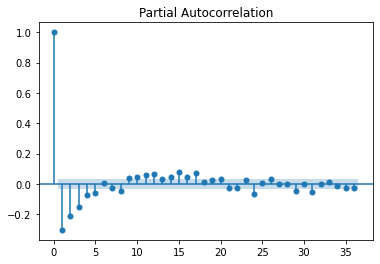

In [218]:
acf = plot_acf(df1['Monthly Mean Total Sunspot Number'].diff().dropna())
pacf = plot_pacf(df1['Monthly Mean Total Sunspot Number'].diff().dropna())

In [8]:
#Seven looks like a good number to chose for lag from PACF
train = Var1[:len(Var1)-7]
test = Var1[len(Var1)-7:]

In [9]:
modelar = AutoReg(train,lags=6).fit()
print(modelar.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3258
Model:                     AutoReg(6)   Log Likelihood              -15090.644
Method:               Conditional MLE   S.D. of innovations             25.065
Date:                Wed, 29 Jun 2022   AIC                              6.448
Time:                        18:04:11   BIC                              6.463
Sample:                             6   HQIC                             6.453
                                 3258                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9043      0.711      4.086      0.000       1.511       4.297
y.L1           0.5756      0.018     32.871      0.000       0.541       0.610
y.L2           0.1127      0.020      5.577      0.0

In [10]:
pred=modelar.predict(start=len(train),end=len(Var1)-1,dynamic=False)
#print(pred)

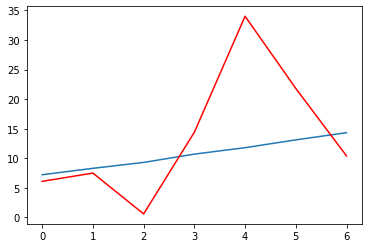

In [11]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test,color='red')

In [201]:
#calculating error
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test,pred))
print(rmse)

9.823038085483079


In [13]:
#making future predictions
predpa=modelar.predict(start=0,end=len(Var1)-1,dynamic=False)

In [202]:
k =df1['Monthly Mean Total Sunspot Number'].values

In [214]:
m= k[6:]

In [205]:
len(Var1)

3265

In [204]:
len(k)

3265

In [206]:
len(predpa)

3259

In [211]:
predpa=modelar.predict(start=0,end=len(Var1)-1,dynamic=False)
rmse = sqrt(mean_squared_error(k[6:],predpa))
print(rmse)

25.042417443963135


In [212]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [215]:
mape(m,predpa)

inf

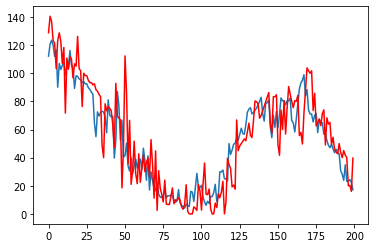

In [14]:
from matplotlib import pyplot
pyplot.plot(predpa[500:700])
pyplot.plot(Var1[500:700],color='red')

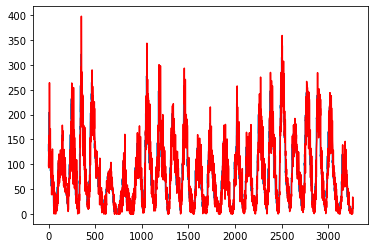

In [196]:
pyplot.plot(predpa)
pyplot.plot(Var1,color='red')

MA

In [162]:
modelma = ARIMA(train, order=(0, 0, 6)).fit()
print(modelma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3258
Model:                 ARIMA(0, 0, 6)   Log Likelihood              -15636.797
Date:                Thu, 30 Jun 2022   AIC                          31289.595
Time:                        03:43:02   BIC                          31338.306
Sample:                             0   HQIC                         31307.043
                               - 3258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.9233      2.762     29.656      0.000      76.509      87.338
ma.L1          0.7882      0.014     58.067      0.000       0.762       0.815
ma.L2          0.7251      0.016     44.550      0.0

In [164]:
predma=modelma.predict(start=len(train),end=len(Var1)-1,dynamic=False)
rmse = sqrt(mean_squared_error(test,predma))
print(rmse)

46.990222848330845


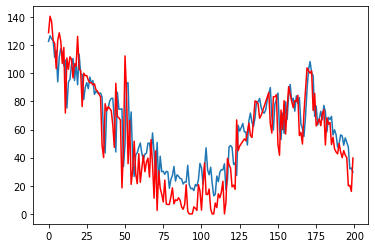

In [165]:
predma=modelma.predict(start=0,end=len(Var1)-1,dynamic=False)
pyplot.plot(predma[500:700])
pyplot.plot(Var1[500:700],color='red')

ARMA

In [15]:
from statsmodels.tsa.arima.model import ARIMA
modelarm = ARIMA(train, order=(6, 0, 2)).fit()
print(modelarm.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3258
Model:                 ARIMA(6, 0, 2)   Log Likelihood              -15117.769
Date:                Wed, 29 Jun 2022   AIC                          30255.538
Time:                        18:04:16   BIC                          30316.427
Sample:                             0   HQIC                         30277.348
                               - 3258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.9119     14.585      5.616      0.000      53.327     110.497
ar.L1          0.0979      0.154      0.634      0.526      -0.205       0.401
ar.L2         -0.0159      0.152     -0.104      0.9

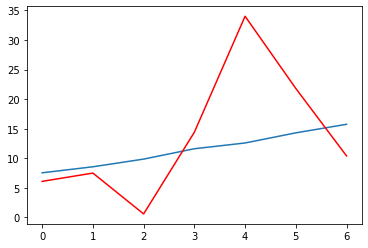

In [16]:
pred1=modelarm.predict(start=len(train),end=len(Var1)-1,dynamic=False)
pyplot.plot(pred1)
pyplot.plot(test,color='red')

In [17]:
#calculating error
rmse = sqrt(mean_squared_error(test,pred1))
print(rmse)

9.562934558514627


In [199]:
#making future predictions
predpar=modelarm.predict(start=0,end=len(Var1)-1,dynamic=False)
rmse = sqrt(mean_squared_error(df1['Monthly Mean Total Sunspot Number'].values,predpar))
print(rmse)

25.029602507559396


In [191]:
rmse = sqrt(mean_squared_error(df1['Monthly Mean Total Sunspot Number'].values,predpar))
print(rmse)

25.029602507559396


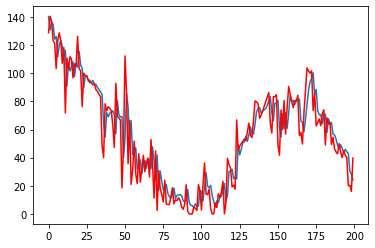

In [19]:
pyplot.plot(predpar[500:700])
pyplot.plot(Var1[500:700],color='red')

ARIMA

In [20]:
from statsmodels.tsa.arima.model import ARIMA
modelari = ARIMA(train, order=(6, 1, 2)).fit()
print(modelari.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3258
Model:                 ARIMA(6, 1, 2)   Log Likelihood              -15127.294
Date:                Wed, 29 Jun 2022   AIC                          30272.588
Time:                        18:04:17   BIC                          30327.385
Sample:                             0   HQIC                         30292.216
                               - 3258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2752      1.450     -0.190      0.849      -3.117       2.567
ar.L2         -0.0986      0.541     -0.182      0.856      -1.160       0.963
ar.L3         -0.1020      0.399     -0.256      0.7

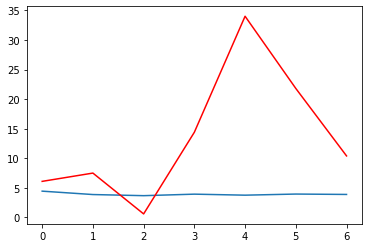

In [166]:
pred2 = modelari.predict(start=len(train),end=len(Var1)-1,dynamic=False)
rmse = sqrt(mean_squared_error(test,pred2))
print(rmse)
pyplot.plot(pred2)
pyplot.plot(test,color='red')

In [167]:
#calculating error
rmse = sqrt(mean_squared_error(test,pred2))
print(rmse)

14.19084235649727


In [23]:
#making future predictions
predpari = modelari.predict(start=0,end=len(Var1)-1,dynamic=False)

In [190]:
rmse = sqrt(mean_squared_error(df1['Monthly Mean Total Sunspot Number'].values,predpari))
print(rmse)

25.20270223155756


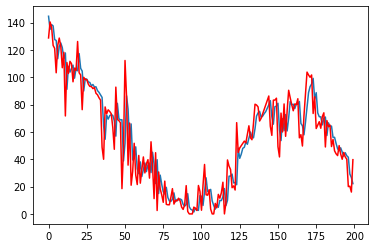

In [24]:
pyplot.plot(predpari[500:700])
pyplot.plot(Var1[500:700],color='red')

In [25]:
modelari1 = ARIMA(train, order=(6, 2, 2)).fit()
predpari1 = modelari1.predict(start=0,end=len(Var1)-1,dynamic=False)

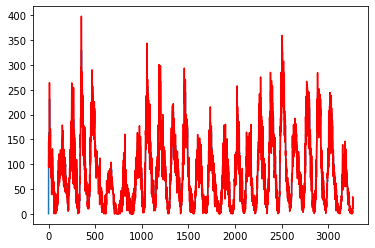

In [188]:
pyplot.plot(predpari1)
pyplot.plot(Var1,color='red')

In [189]:
rmse = sqrt(mean_squared_error(df1['Monthly Mean Total Sunspot Number'].values,predpari1))
print(rmse)

25.269817163817603


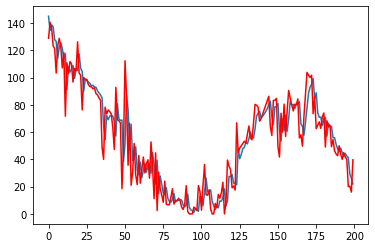

In [26]:
pyplot.plot(predpari1[500:700])
pyplot.plot(Var1[500:700],color='red')

Using supervised machine learning methods

In [104]:
co2_data.co2.values

array([316.1, 317.3, 317.6, ..., 371.2, 371.3, 371.5])

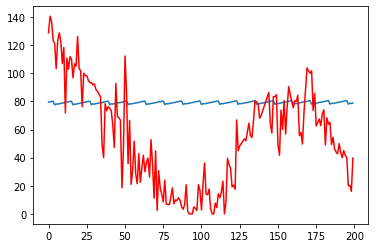

In [133]:
#linear regression
from sklearn.linear_model import LinearRegression
 
# fit the model
my_lr = LinearRegression()
my_lr.fit(X, df1['Monthly Mean Total Sunspot Number'].values)
 
# predict on the same period
predsl = my_lr.predict(X)
 
# plot what has been learned
#plt.plot(df1.index, Var1)#[500:700])
#plt.plot(df1.index, preds)#[500:700])
pyplot.plot(predsl[500:700])
pyplot.plot(Var1[500:700],color='red')

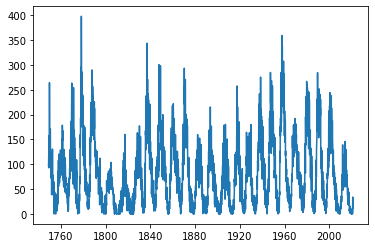

In [115]:
plt.plot(df1.index, Var1)

In [111]:
preds

array([76.20958954, 76.8911491 , 76.66752175, ..., 87.09816807,
       87.17626969, 84.68881618])

In [113]:
preds.shape

(3265,)

In [114]:
Var1.shape

(3265,)

In [171]:
len(train)

3258

In [175]:
predsl

array([76.20958954, 76.8911491 , 76.66752175, ..., 87.09816807,
       87.17626969, 84.68881618])

In [170]:
len(Var1)-1

3264

In [179]:
rmse = sqrt(mean_squared_error(df1['Monthly Mean Total Sunspot Number'].values,predpari))
print(rmse)

25.20270223155756


In [177]:
#predlr = my_lr.predict(start=len(train),end=len(Var1)-1,dynamic=False)
rmse = sqrt(mean_squared_error(df1['Monthly Mean Total Sunspot Number'].values,predsl))
print(rmse)

67.8303717205597


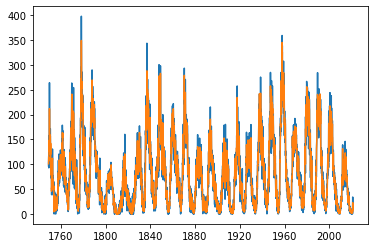

In [234]:
from sklearn.ensemble import RandomForestRegressor
 
# fit the model
my_rf = RandomForestRegressor()
my_rf.fit(X,df1['Monthly Mean Total Sunspot Number'].values)
 
# predict on the same period
preds = my_rf.predict(X)
 
# plot what has been learned
plt.plot(df1.index,df1['Monthly Mean Total Sunspot Number'].values)
plt.plot(df1.index, preds)

In [230]:
row = df1['Monthly Mean Total Sunspot Number'].values.flatten()

In [248]:
X

array([[  31,    1, 1749],
       [  28,    2, 1749],
       [  31,    3, 1749],
       ...,
       [  30,   11, 2020],
       [  31,   12, 2020],
       [  31,    1, 2021]])

In [241]:
len(preds)

3265

In [244]:
len(preds1)

3265

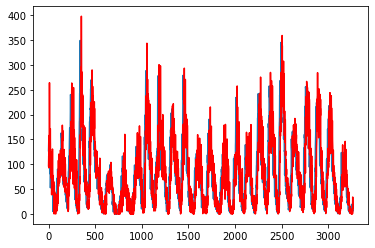

In [236]:
pyplot.plot(preds1)
pyplot.plot(Var1,color='red')

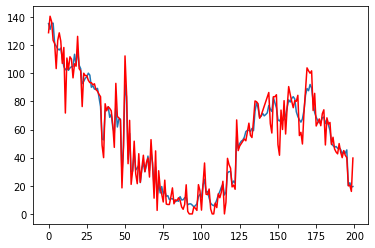

In [127]:
pyplot.plot(preds[500:700])
pyplot.plot(Var1[500:700],color='red')

In [220]:
rmse = sqrt(mean_squared_error(df1['Monthly Mean Total Sunspot Number'].values,preds))
print(rmse)

9.194701404233683


In [123]:
!pip install xgboost

     |████████████████████████████████| 1.7 MB 157 kB/s eta 0:00:01


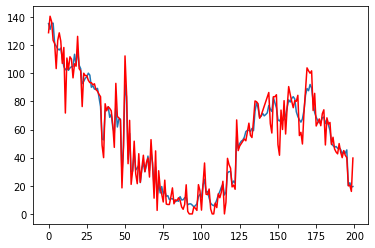

In [221]:
import xgboost as xgb
 
# fit the model
my_xgb = xgb.XGBRegressor()
my_xgb.fit(X, df1['Monthly Mean Total Sunspot Number'].values)
 
# predict on the same period
predsx = my_xgb.predict(X)
 
# plot what has been learned
pyplot.plot(predsx[500:700])
pyplot.plot(Var1[500:700],color='red')

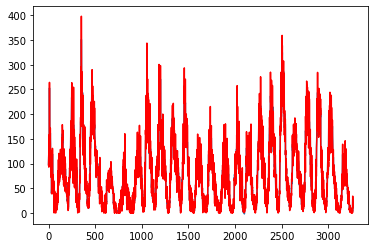

In [130]:
pyplot.plot(predsx)
pyplot.plot(Var1,color='red')

In [222]:
rmse = sqrt(mean_squared_error(df1['Monthly Mean Total Sunspot Number'].values,predsx))
print(rmse)

13.698351042406388


Now, using deep machine learning models

In [37]:
!pip install tensorflow

     |████████████████████████████████| 228.5 MB 3.1 kB/s eta 0:00:01    |███▍                            | 24.4 MB 452 kB/s eta 0:07:31     |████▊                           | 33.4 MB 115 kB/s eta 0:28:15     |█████                           | 34.9 MB 335 kB/s eta 0:09:37     |██████                          | 42.4 MB 215 kB/s eta 0:14:24     |███████████▎                    | 80.4 MB 260 kB/s eta 0:09:28     |████████████▊                   | 90.6 MB 225 kB/s eta 0:10:12     |██████████████████████████████  | 214.5 MB 267 kB/s eta 0:00:52
     |████████████████████████████████| 65 kB 612 kB/s eta 0:00:01     |█████████████████████████       | 51 kB 486 kB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 182 kB/s eta 0:00:01     |████████████████                | 819 kB 97 kB/s eta 0:00:09
     |████████████████████████████████| 123 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 961 kB 401 kB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 213

In [45]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [38]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

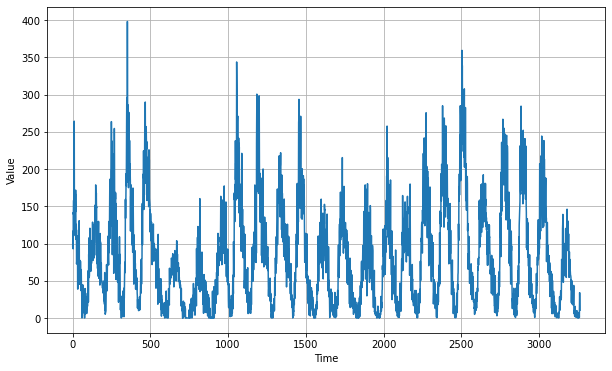

In [39]:
import csv
time_step = []
sunspots = []

with open('sunspots.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))

series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

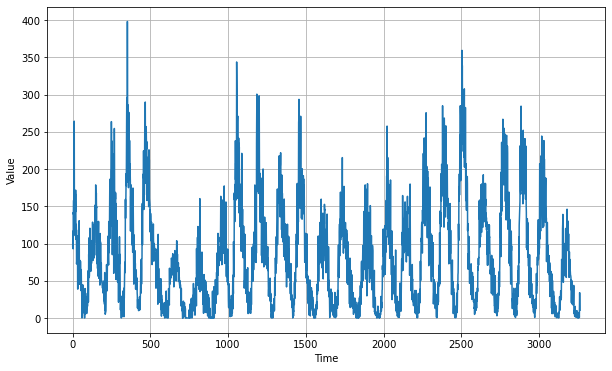

In [40]:
series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [41]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [42]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [43]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [46]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
(3000,)
Epoch 1/100
12/12 [==============================] - 6s 239ms/step - loss: 79.8340 - mae: 80.3314 - lr: 1.0000e-08
Epoch 2/100
12/12 [==============================] - 3s 211ms/step - loss: 78.0944 - mae: 78.5918 - lr: 1.1220e-08
Epoch 3/100
12/12 [==============================] - 3s 205ms/step - loss: 75.4519 - mae: 75.9497 - lr: 1.2589e-08
Epoch 4/100
12/12 [==============================] - 3s 203ms/step - loss: 72.2679 - mae: 72.7658 - lr: 1.4125e-08
Epoch 5/100
12/12 [==============================] - 3s 203ms/step - loss: 68.7693 - mae: 69.2672 - lr: 1.5849e-08
Epoch 6/100
12/12 [==============================] - 3s 205ms/step - loss: 65.1128 - mae: 65.6099 - lr: 1.7783e-08
Epoch 7/100
12/12 [==============================] - 3s 205ms/step - loss: 61.5272 - mae: 62.0241 - lr: 1.9953e-08
Epoch 8/100
12/12 [========

(1e-08, 0.0001, 0.0, 60.0)

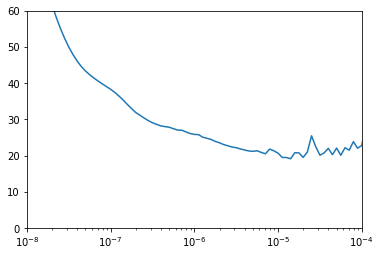

In [47]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [48]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

Epoch 1/500
30/30 [==============================] - 14s 207ms/step - loss: 38.9180 - mae: 39.4144
Epoch 2/500
30/30 [==============================] - 5s 158ms/step - loss: 25.7651 - mae: 26.2595
Epoch 3/500
30/30 [==============================] - 4s 135ms/step - loss: 22.0822 - mae: 22.5759
Epoch 4/500
30/30 [==============================] - 4s 134ms/step - loss: 20.4593 - mae: 20.9523
Epoch 5/500
30/30 [==============================] - 4s 141ms/step - loss: 19.3024 - mae: 19.7945
Epoch 6/500
30/30 [==============================] - 5s 166ms/step - loss: 19.1091 - mae: 19.6012
Epoch 7/500
30/30 [==============================] - 4s 128ms/step - loss: 18.4435 - mae: 18.9356
Epoch 8/500
30/30 [==============================] - 4s 124ms/step - loss: 18.3340 - mae: 18.8256
Epoch 9/500
30/30 [==============================] - 4s 127ms/step - loss: 18.0827 - mae: 18.5742
Epoch 10/500
30/30 [==============================] - 5s 155ms/step - loss: 17.9411 - mae: 18.4323
Epoch 11/500
30/30

In [50]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

101/101 [==============================] - 3s 17ms/step


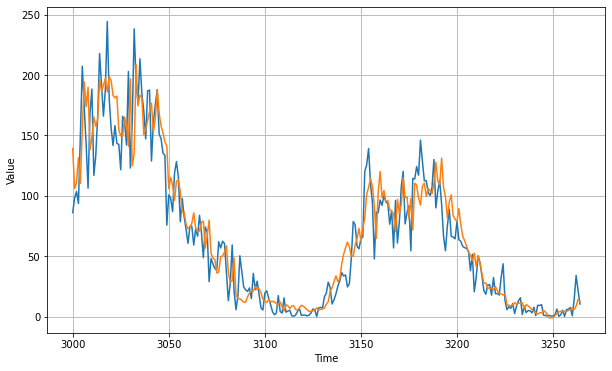

In [51]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)